***Build model only***

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_neural_network(input_size, hidden_sizes, output_size):
    """
    Vẽ kiến trúc mạng neuron (MLP).

    Args:
    - input_size (int): Số lượng neuron trong tầng đầu vào.
    - hidden_sizes (list of int): Danh sách số lượng neuron trong các tầng ẩn.
    - output_size (int): Số lượng neuron trong tầng đầu ra.
    """
    G = nx.DiGraph()

    # Layers
    layers = [input_size] + hidden_sizes + [output_size]
    layer_labels = ['Input'] + [f'Hidden {i+1}' for i in range(len(hidden_sizes))] + ['Output']

    pos = {}
    node_colors = []
    node_labels = {}

    for layer_idx, (layer_size, label) in enumerate(zip(layers, layer_labels)):
        x_offset = -layer_size // 2
        for neuron_idx in range(layer_size):
            node_id = f"L{layer_idx}_N{neuron_idx}"
            pos[node_id] = (x_offset + neuron_idx, -layer_idx * 2)
            node_colors.append(layer_idx)
            node_labels[node_id] = f"{label} {neuron_idx + 1}" if layer_idx in [0, len(layers)-1] else ""
            if layer_idx > 0:  # Connect to the previous layer
                prev_layer_size = layers[layer_idx - 1]
                for prev_neuron_idx in range(prev_layer_size):
                    prev_node_id = f"L{layer_idx-1}_N{prev_neuron_idx}"
                    G.add_edge(prev_node_id, node_id)

    # Plot graph
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=False, node_color=node_colors, cmap='cool', node_size=600, alpha=0.9)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)
    plt.title("Neural Network Architecture (MLP)", fontsize=14)
    plt.axis("off")
    plt.show()

# Sử dụng hàm vẽ
input_size = len(available_features)  # Số lượng đặc trưng đầu vào
hidden_sizes = [100]  # Kiến trúc mạng với một tầng ẩn và 100 neuron
output_size = 1  # Một đầu ra cho dự đoán

draw_neural_network(input_size, hidden_sizes, output_size)


<ipython-input-1-9cb593aca3cd>:10: DtypeWarning: Columns (22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  sinhvien_df = pd.read_csv("/content/sinhvien.csv", encoding="latin1").drop_duplicates()



Test Data with Predictions:
        drl  sotc  Actual  Predicted     Error
28418  87.0     3     4.0   7.065532 -3.065532
18294  87.0     4     8.0   6.735834  1.264166
14805  82.0     4     5.0   6.448723 -1.448723
83156  77.0     3     7.3   6.491223  0.808777
38388  94.0     3     6.0   7.467549 -1.467549

Model Performance:
MAE: 1.7714
RMSE: 2.3568
R-squared: 0.1110

Validation Performance:
MAE: 1.7413
RMSE: 2.3129
R-squared: 0.1166

Validation Data with Predictions:
         drl  sotc  Actual  Predicted     Error
73305   95.0     4     5.8   7.195200 -1.395200
64744   63.0     4     6.5   5.350931  1.149069
148612  77.0     4     6.8   6.159995  0.640005
33218   91.0     4     9.5   6.965508  2.534492
138165  98.0     3     0.0   7.697273 -7.697273

Accuracy on Test Set (±10% tolerance): 26.10%
Accuracy on Validation Set (±10% tolerance): 25.76%


***Network***

<ipython-input-3-ac1a9fb9c7f5>:12: DtypeWarning: Columns (22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  sinhvien_df = pd.read_csv("/content/sinhvien.csv", encoding="latin1").drop_duplicates()



Model Performance:
MAE: 1.7714
RMSE: 2.3568
R-squared: 0.1110

Validation Performance:
MAE: 1.7413
RMSE: 2.3129
R-squared: 0.1166

Accuracy on Test Set (±10% tolerance): 26.10%
Accuracy on Validation Set (±10% tolerance): 25.76%


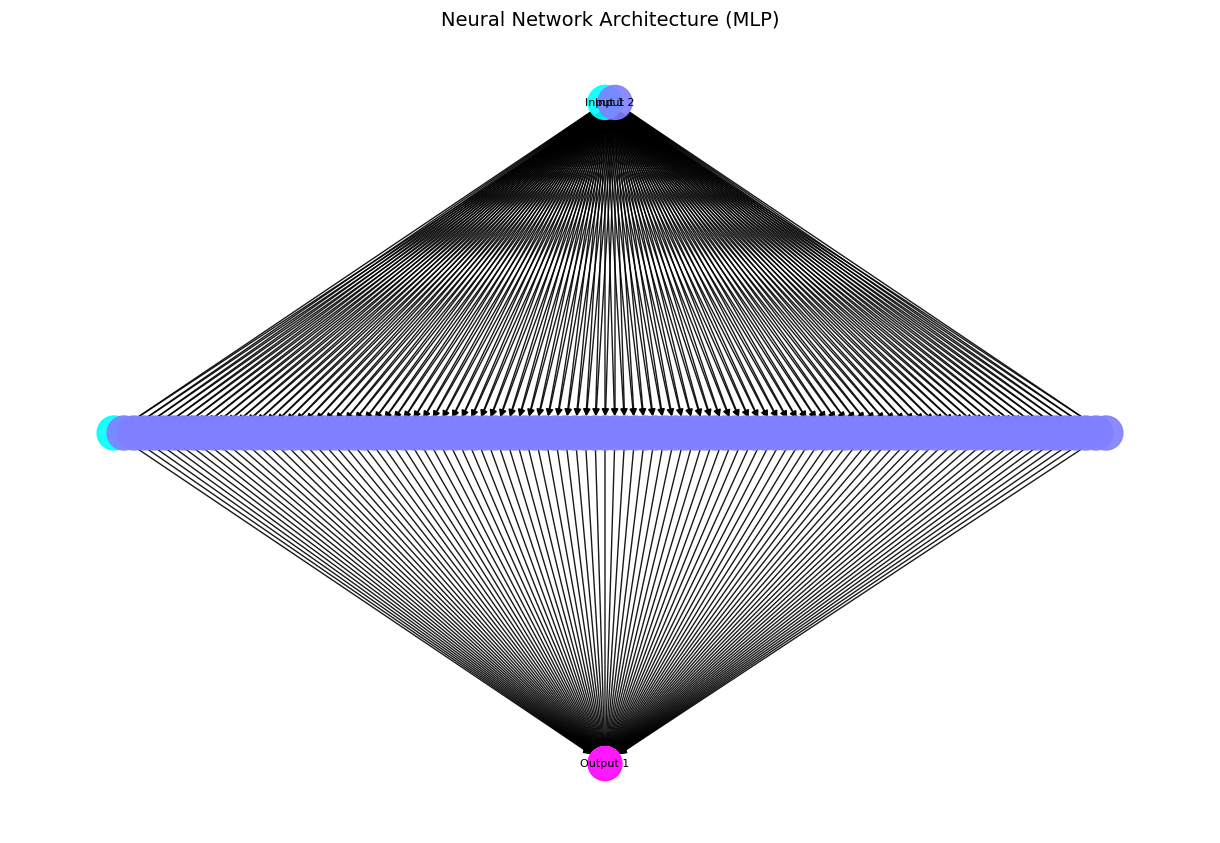

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# 1. Load Data
diemrl_df = pd.read_csv("/content/diemrl.csv", encoding="utf-8").drop_duplicates()
diemthu_df = pd.read_csv("/content/diemthu.csv", encoding="utf-8").drop_duplicates()
sinhvien_df = pd.read_csv("/content/sinhvien.csv", encoding="latin1").drop_duplicates()

# 2. Clean Column Names
diemrl_df.columns = diemrl_df.columns.str.strip()
diemthu_df.columns = diemthu_df.columns.str.strip()
sinhvien_df.columns = sinhvien_df.columns.str.strip()

# 3. Data Cleaning
if "drl" not in diemrl_df.columns:
    raise KeyError("Cột 'drl' không tồn tại trong diemrl_df. Vui lòng kiểm tra dữ liệu!")
diemrl_df = diemrl_df.dropna(subset=["drl"])

required_columns_diemthu = ["mssv", "diem_hp"]
required_columns_sinhvien = ["mssv"]
for col in required_columns_diemthu:
    if col not in diemthu_df.columns:
        raise KeyError(f"Cột '{col}' không tồn tại trong diemthu_df!")
for col in required_columns_sinhvien:
    if col not in sinhvien_df.columns:
        raise KeyError(f"Cột '{col}' không tồn tại trong sinhvien_df!")

diemthu_df = diemthu_df.dropna(subset=required_columns_diemthu)
sinhvien_df = sinhvien_df.dropna(subset=required_columns_sinhvien)

data = pd.merge(diemthu_df, diemrl_df, on="mssv", how="inner")
data = pd.merge(data, sinhvien_df, on="mssv", how="inner")

available_features = [col for col in ["drl", "sotc", "namhoc", "hocky"] if col in data.columns]
if len(available_features) < 1:
    raise ValueError("Không có cột nào trong 'features' tồn tại trong dữ liệu!")
target = "diem_hp"
if target not in data.columns:
    raise KeyError(f"Cột '{target}' không tồn tại trong dữ liệu!")

data = data.dropna(subset=available_features + [target])

X = data[available_features]
y = data[target]

# 4. Split Data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 5. Build and Train MLP Model
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42, max_iter=500)
mlp_model.fit(X_train, y_train)

# 6. Evaluate Model
y_pred_train = mlp_model.predict(X_train)
y_pred_test = mlp_model.predict(X_test)

# Add Predicted Scores, Actual Scores, and Error to Test Data
X_test_with_results = X_test.copy()
X_test_with_results["Actual"] = y_test.values
X_test_with_results["Predicted"] = y_pred_test
X_test_with_results["Error"] = X_test_with_results["Actual"] - X_test_with_results["Predicted"]

# Metrics
metrics = {
    "MAE": mean_absolute_error(y_test, y_pred_test),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test)),
    "R-squared": r2_score(y_test, y_pred_test),
}

print("\nModel Performance:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# 7. Validate the Model
y_pred_val = mlp_model.predict(X_val)
val_metrics = {
    "MAE": mean_absolute_error(y_val, y_pred_val),
    "RMSE": np.sqrt(mean_squared_error(y_val, y_pred_val)),
    "R-squared": r2_score(y_val, y_pred_val),
}

print("\nValidation Performance:")
for metric, value in val_metrics.items():
    print(f"{metric}: {value:.4f}")

# 8. Accuracy Metric
def calculate_accuracy(y_true, y_pred, tolerance=0.1):
    return np.mean(np.abs(y_true - y_pred) <= tolerance * np.abs(y_true)) * 100

accuracy_test = calculate_accuracy(y_test, y_pred_test, tolerance=0.1)
accuracy_val = calculate_accuracy(y_val, y_pred_val, tolerance=0.1)

print(f"\nAccuracy on Test Set (±10% tolerance): {accuracy_test:.2f}%")
print(f"Accuracy on Validation Set (±10% tolerance): {accuracy_val:.2f}%")

# Save results
X_test_with_results.to_csv("mlp_test_results.csv", index=False)

# 9. Visualize Neural Network Architecture
def draw_neural_network(input_size, hidden_sizes, output_size):
    G = nx.DiGraph()
    layers = [input_size] + hidden_sizes + [output_size]
    layer_labels = ['Input'] + [f'Hidden {i+1}' for i in range(len(hidden_sizes))] + ['Output']

    pos = {}
    node_colors = []
    node_labels = {}

    for layer_idx, (layer_size, label) in enumerate(zip(layers, layer_labels)):
        x_offset = -layer_size // 2
        for neuron_idx in range(layer_size):
            node_id = f"L{layer_idx}_N{neuron_idx}"
            pos[node_id] = (x_offset + neuron_idx, -layer_idx * 2)
            node_colors.append(layer_idx)
            node_labels[node_id] = f"{label} {neuron_idx + 1}" if layer_idx in [0, len(layers)-1] else ""
            if layer_idx > 0:
                prev_layer_size = layers[layer_idx - 1]
                for prev_neuron_idx in range(prev_layer_size):
                    prev_node_id = f"L{layer_idx-1}_N{prev_neuron_idx}"
                    G.add_edge(prev_node_id, node_id)

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=False, node_color=node_colors, cmap='cool', node_size=600, alpha=0.9)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)
    plt.title("Neural Network Architecture (MLP)"d, fontsize=14)
    plt.axis("off")
    plt.show()

# Visualize the architecture
input_size = len(available_features)
hidden_sizes = [100]
output_size = 1
draw_neural_network(input_size, hidden_sizes, output_size)
